In [88]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math
from joblib import Parallel, delayed
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_curve, auc

In [4]:
df = pd.read_excel("C:\\Users\\user\\Desktop\\machine\\data_1015.xlsx",sheet_name="Sheet1")

In [6]:
df = df[['fixed_type','ht_omr_data']]

In [111]:
df.iloc[:,:-1].value_counts()

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  Q29  Q30  Q31  Q32  Q33  Q34  Q35  Q36  Q37  Q38  Q39  Q40  Q41  Q42  Q43  Q44  Q45  Q46  Q47  Q48  Q49  Q50  Q51  Q52  Q53  Q54  Q55  Q56  Q57  Q58  Q59  Q60  Q61  Q62  Q63  Q64  Q65  Q66  Q67  Q68  Q69  Q70  Q71  Q72  Q73  Q74  Q75  Q76  Q77  Q78  Q79  Q80  Q81  Q82  Q83  Q84  Q85  Q86  Q87  Q88  Q89  Q90  Q91  Q92  Q93  Q94  Q95  Q96  Q97  Q98  Q99  Q100  Q101  Q102  Q103  Q104  Q105  Q106  Q107  Q108  Q109  Q110  Q111  Q112  Q113  Q114  Q115  Q116  Q117  Q118  Q119  Q120  Q121  Q122  Q123  Q124  Q125  Q126  Q127  Q128  Q129  Q130  Q131  Q132  Q133  Q134  Q135  Q136  Q137  Q138  Q139  Q140  Q141  Q142  Q143  Q144  Q145  Q146  Q147  Q148  Q149  Q150  Q151  Q152  Q153  Q154  Q155  Q156  Q157  Q158  Q159  Q160  Q161  Q162  Q163  Q164  Q165  Q166  Q167  Q168  Q169  Q170  Q171  Q172  Q173  Q174  Q175  Q176  Q177  Q178  Q179  Q180  Q181  Q182  Q183  Q184  Q185

In [14]:
def split_omr_data(df):
    # 'ht_omr_data' 열의 값을 리스트로 변환 (한 글자씩)
    omr_responses = df['ht_omr_data'].apply(lambda x: list(x[:375]))  # 480개의 문항까지만 자름
    # 리스트를 각각의 문항으로 나누어 새로운 컬럼으로 변환
    omr_df = pd.DataFrame(omr_responses.tolist(), columns=[f'Q{i+1}' for i in range(375)])
    # 원래 df와 결합
    df = pd.concat([df, omr_df], axis=1)
    return df

# 데이터 분리 실행
df_split = split_omr_data(df)

# 결과 확인
print(df_split.head())

  fixed_type                                        ht_omr_data Q1 Q2 Q3 Q4  \
0          A  9011110110000010001001001000101010001001101010...  9  0  1  1   
1          C  1100010110000000001001101099100111011001101010...  1  1  0  0   
2          M  9110000110100000000001111000101010000000101110...  9  1  1  0   
3          M  0000010110000000001000000000101010001000000010...  0  0  0  0   
4          B  0000100111010000011000101000101010000001000100...  0  0  0  0   

  Q5 Q6 Q7 Q8  ... Q366 Q367 Q368 Q369 Q370 Q371 Q372 Q373 Q374 Q375  
0  1  1  0  1  ...    0    0    0    0    0    1    0    0    0    1  
1  0  1  0  1  ...    0    0    1    0    0    1    0    0    1    1  
2  0  0  0  1  ...    0    0    1    0    0    1    0    0    0    1  
3  0  1  0  1  ...    0    1    1    0    0    1    0    1    0    1  
4  1  0  0  1  ...    1    0    1    0    0    1    0    0    1    1  

[5 rows x 377 columns]


In [19]:
df['fixed_type'].unique()

array(['A', 'C', 'M', 'B', 'D', 'E', 'X', 'Ma', 'R', 'D1', 'D2', 'Mc',
       'Mb', 'M1', 'M2'], dtype=object)

In [24]:
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'fixed_type'을 숫자형으로 변환
df['fixed_type_encoded'] = label_encoder.fit_transform(df['fixed_type'])

# 변환된 레이블 확인
print(df[['fixed_type', 'fixed_type_encoded']].head())

# 클래스 목록 확인 (숫자형으로 매핑된 고유값들)
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


  fixed_type  fixed_type_encoded
0          A                   0
1          C                   2
2          M                   7
3          M                   7
4          B                   1
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'D1': 4, 'D2': 5, 'E': 6, 'M': 7, 'M1': 8, 'M2': 9, 'Ma': 10, 'Mb': 11, 'Mc': 12, 'R': 13, 'X': 14}


In [30]:
df = df.drop(['fixed_type','ht_omr_data'], axis=1)

In [31]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q367,Q368,Q369,Q370,Q371,Q372,Q373,Q374,Q375,fixed_type_encoded
0,9,0,1,1,1,1,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,1,0,0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,1,2
2,9,1,1,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,7
3,0,0,0,0,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,1,7
4,0,0,0,0,1,0,0,1,1,1,...,0,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,0,1,1,0,1,0,0,1,1,0,...,0,1,0,1,1,0,0,1,1,0
30867,1,0,0,0,0,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,7
30868,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,1,1,0
30869,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0


In [62]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size = 0.3, random_state = 1000)

In [63]:
def modeling_uncustomized_parallel(algorithm, x_train, y_train, x_test, y_test, n_jobs=-1):
    # 병렬처리로 하이퍼파라미터 조정 없이 모델 학습
    def fit_model(algorithm, x_train, y_train):
        model = algorithm(random_state=1000)
        model.fit(x_train, y_train)
        return model
    
    # 병렬 처리로 모델 학습
    models = Parallel(n_jobs=n_jobs)(delayed(fit_model)(algorithm, x_train, y_train) for _ in range(1))

    # 각 모델에 대해 train/test 정확도 계산
    for model in models:
        # Train Data 설명력
        train_score_before = round(model.score(x_train, y_train), 3)
        print(f"학습 데이터셋 정확도: {train_score_before}")

        # Test Data 설명력
        test_score_before = round(model.score(x_test, y_test), 3)
        print(f"테스트 데이터셋 정확도: {test_score_before}")

    return train_score_before, test_score_before


In [64]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.savefig('C:\\Users\\user\\Desktop\\machine\\figure\\' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

In [65]:
def model_fit_and_score(algorithm, x_train, y_train, x_test, y_test, n_estimators):
    model = algorithm(n_estimators=n_estimators, random_state=1000)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return n_estimators, train_score, test_score

def optimi_estimator_parallel(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max, n_jobs=-1):
    para_n_tree = [n_tree * 5 for n_tree in range(n_estimator_min, n_estimator_max)]
    
    # 병렬 처리를 사용하여 모델을 학습하고 성능을 평가
    results = Parallel(n_jobs=n_jobs)(
        delayed(model_fit_and_score)(algorithm, x_train, y_train, x_test, y_test, n_estimators) 
        for n_estimators in para_n_tree
    )

    # 결과를 정리하여 데이터프레임으로 저장
    df_score_n = pd.DataFrame(results, columns=['n_estimators', 'TrainScore', 'TestScore'])
    
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, df_score_n['n_estimators'], df_score_n['TrainScore'], df_score_n['TestScore'], "The number of estimator", "n_estimator")

    # 성능 결과 출력
    print(df_score_n.round(4))



In [66]:
def model_fit_and_score_max_depth(algorithm, x_train, y_train, x_test, y_test, max_depth, n_estimator):
    # 의사결정나무 모델의 경우 n_estimators를 설정하지 않음
    if algorithm == DTC:
        model = algorithm(max_depth=max_depth, random_state=1000)
    else:
        model = algorithm(max_depth=max_depth, n_estimators=n_estimator, random_state=1000)
    
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return max_depth, train_score, test_score

def optimi_maxdepth_parallel(algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator, n_jobs=-1):
    para_depth = [depth for depth in range(depth_min, depth_max)]
    
    # 병렬 처리를 사용하여 모델을 학습하고 성능을 평가
    results = Parallel(n_jobs=n_jobs)(
        delayed(model_fit_and_score_max_depth)(algorithm, x_train, y_train, x_test, y_test, max_depth, n_estimator) 
        for max_depth in para_depth
    )

    # 결과를 정리하여 데이터프레임으로 저장
    df_score_n = pd.DataFrame(results, columns=['depth', 'TrainScore', 'TestScore'])
    
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, df_score_n['depth'], df_score_n['TrainScore'], df_score_n['TestScore'], "The number of depth", "n_depth")

    # 성능 결과 출력
    print(df_score_n.round(4))



In [67]:
def model_fit_and_score_min_split(algorithm, x_train, y_train, x_test, y_test, min_samples_split, n_estimator, n_depth):
    # 의사결정나무 모델의 경우 n_estimators를 설정하지 않음
    if algorithm == DTC:
        model = algorithm(min_samples_split=min_samples_split, max_depth=n_depth, random_state=1000)
    else:
        model = algorithm(min_samples_split=min_samples_split, n_estimators=n_estimator, max_depth=n_depth, random_state=1000)
    
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return min_samples_split, train_score, test_score

def optimi_minsplit_parallel(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth, n_jobs=-1):
    para_split = [n_split * 2 for n_split in range(n_split_min, n_split_max)]
    
    # 병렬 처리를 사용하여 모델을 학습하고 성능을 평가
    results = Parallel(n_jobs=n_jobs)(
        delayed(model_fit_and_score_min_split)(algorithm, x_train, y_train, x_test, y_test, min_samples_split, n_estimator, n_depth) 
        for min_samples_split in para_split
    )

    # 결과를 정리하여 데이터프레임으로 저장
    df_score_n = pd.DataFrame(results, columns=['min_samples_split', 'TrainScore', 'TestScore'])
    
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, df_score_n['min_samples_split'], df_score_n['TrainScore'], df_score_n['TestScore'], "The minimum number of samples required to split an internal node", "min_samples_split")

    # 성능 결과 출력
    print(df_score_n.round(4))



In [68]:
def model_fit_and_score_min_leaf(algorithm, x_train, y_train, x_test, y_test, min_samples_leaf, n_estimator, n_depth, n_split):
    # 의사결정나무 모델의 경우 n_estimators를 설정하지 않음
    if algorithm == DTC:
        model = algorithm(min_samples_leaf=min_samples_leaf, max_depth=n_depth, min_samples_split=n_split, random_state=1000)
    else:
        model = algorithm(min_samples_leaf=min_samples_leaf, n_estimators=n_estimator, max_depth=n_depth, min_samples_split=n_split, random_state=1000)
    
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return min_samples_leaf, train_score, test_score

def optimi_minleaf_parallel(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split, n_jobs=-1):
    para_leaf = [n_leaf * 2 for n_leaf in range(n_leaf_min, n_leaf_max)]
    
    # 병렬 처리를 사용하여 모델을 학습하고 성능을 평가
    results = Parallel(n_jobs=n_jobs)(
        delayed(model_fit_and_score_min_leaf)(algorithm, x_train, y_train, x_test, y_test, min_samples_leaf, n_estimator, n_depth, n_split) 
        for min_samples_leaf in para_leaf
    )

    # 결과를 정리하여 데이터프레임으로 저장
    df_score_n = pd.DataFrame(results, columns=['min_samples_leaf', 'TrainScore', 'TestScore'])
    
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, df_score_n['min_samples_leaf'], df_score_n['TrainScore'], df_score_n['TestScore'], "The minimum number of samples required to be at a leaf node", "min_samples_leaf")

    # 성능 결과 출력
    print(df_score_n.round(4))



In [97]:
def model_final(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1000, 
                          min_samples_leaf=n_leaf,
                          min_samples_split=n_split, 
                          max_depth=n_depth)
    else:
        model = algorithm(random_state=1000, 
                          n_estimators=n_estimator, 
                          min_samples_leaf=n_leaf,
                          min_samples_split=n_split, 
                          max_depth=n_depth)
    
    # 모델 학습
    model.fit(x_train, y_train)
    
    # 모델 저장
    model_path = 'C:\\Users\\user\\Desktop\\machine\\'
    model_filename = 'omr_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")  # 정확도
    print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.3f}")  # 정밀도 (다중 클래스)
    print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.3f}")        # 재현율 (다중 클래스)
    print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.3f}")          # F1-score (다중 클래스)
    
    # 혼동행렬 시각화 코드 수정
    plt.figure(figsize=(10, 10))
    cm_display = ConfusionMatrixDisplay.from_estimator(
        model, x_test, y_test, cmap='Pastel1', include_values=True, display_labels=None  # display_labels 수정
    )
    plt.savefig(model_path + 'figure\\' + algorithm_name + '_confusion_matrix.png')  # 혼동행렬 저장
    plt.show()
    
    # ROC 커브 계산 (다중 클래스)
    if hasattr(model, "predict_proba"):  # 예측 확률값이 있는 경우에만 계산
        y_pred_prob = model.predict_proba(x_test)
        
        unique_classes = model.classes_
        
        # 각 클래스에 대해 y_test에 실제로 존재하는지 확인하고, 2개 이상의 클래스가 존재할 때만 AUC 계산
        if len(np.unique(y_test)) > 1:
            try:
                roc_auc = roc_auc_score(y_test, y_pred_prob, labels=unique_classes, multi_class='ovr', average='macro')
                print(f"ROC AUC (macro): {roc_auc:.3f}")
            except ValueError as e:
                print(f"ROC AUC could not be calculated: {str(e)}")
        else:
            print("Warning: Only one class present in y_test. ROC AUC score cannot be computed.")

        # ROC 커브 시각화
        plt.figure(figsize=(10, 8))
        for i in range(len(model.classes_)):
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
            plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (area = {auc(fpr, tpr):.3f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{algorithm_name} ROC Curve (multi-class)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.savefig(model_path + 'figure\\' + algorithm_name + '_roc_curve.png')  # ROC 그래프 저장
        plt.show()


In [70]:
algorithm = RFC
algorithm_name = 'rfc'

In [71]:
train_acc_before, test_acc_before = modeling_uncustomized_parallel(algorithm, 
                                                          x_train,
                                                          y_train,
                                                          x_test,
                                                          y_test)

학습 데이터셋 정확도: 1.0
테스트 데이터셋 정확도: 0.571


    n_estimators  TrainScore  TestScore
0              5      0.9504     0.4526
1             10      0.9902     0.5100
2             15      0.9973     0.5348
3             20      0.9991     0.5471
4             25      0.9999     0.5586
5             30      0.9998     0.5604
6             35      1.0000     0.5608
7             40      1.0000     0.5625
8             45      1.0000     0.5655
9             50      1.0000     0.5669
10            55      1.0000     0.5682
11            60      1.0000     0.5679
12            65      1.0000     0.5691
13            70      1.0000     0.5704
14            75      1.0000     0.5705
15            80      1.0000     0.5718
16            85      1.0000     0.5706
17            90      1.0000     0.5731
18            95      1.0000     0.5713
19           100      1.0000     0.5707
20           105      1.0000     0.5720
21           110      1.0000     0.5713
22           115      1.0000     0.5716
23           120      1.0000     0.5694


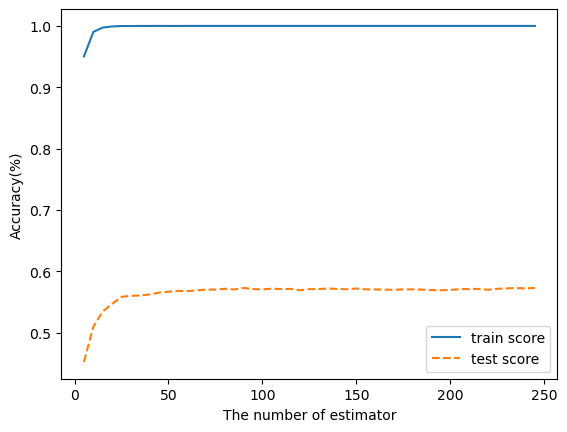

In [72]:
n_estimator_min = 1
n_estimator_max = 50
optimi_estimator_parallel(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [100]:
n_estimator = 665

    depth  TrainScore  TestScore
0       1      0.4411     0.4430
1       2      0.4411     0.4430
2       3      0.4676     0.4662
3       4      0.4886     0.4872
4       5      0.4969     0.4967
5       6      0.5053     0.5017
6       7      0.5116     0.5050
7       8      0.5231     0.5096
8       9      0.5401     0.5170
9      10      0.5729     0.5244
10     11      0.6296     0.5327
11     12      0.7186     0.5431
12     13      0.8217     0.5485
13     14      0.9059     0.5523
14     15      0.9579     0.5577
15     16      0.9828     0.5598
16     17      0.9921     0.5604
17     18      0.9958     0.5638
18     19      0.9982     0.5649
19     20      0.9988     0.5649
20     21      0.9995     0.5658
21     22      0.9998     0.5705
22     23      0.9999     0.5666
23     24      1.0000     0.5682
24     25      1.0000     0.5697
25     26      1.0000     0.5681
26     27      1.0000     0.5705
27     28      1.0000     0.5703
28     29      1.0000     0.5705
29     30 

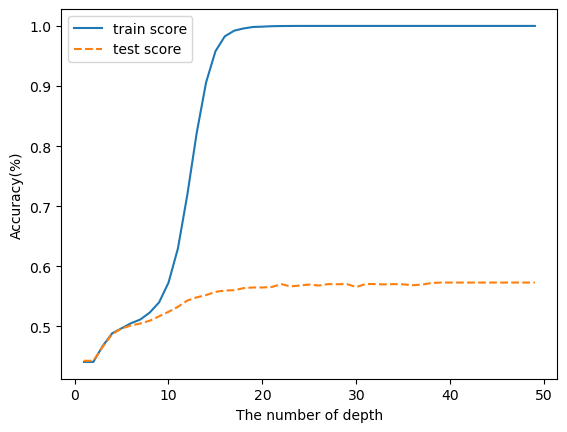

In [74]:
depth_min = 1
depth_max = 50
optimi_maxdepth_parallel(algorithm, algorithm_name, 
                x_train, y_train, x_test, y_test, 
                depth_min, depth_max, n_estimator)

In [101]:
n_depth = 21

    min_samples_split  TrainScore  TestScore
0                   2      0.9958     0.5638
1                   4      0.9914     0.5659
2                   6      0.9745     0.5628
3                   8      0.9446     0.5634
4                  10      0.9091     0.5606
5                  12      0.8678     0.5608
6                  14      0.8312     0.5569
7                  16      0.8025     0.5558
8                  18      0.7755     0.5558
9                  20      0.7519     0.5558
10                 22      0.7332     0.5528
11                 24      0.7174     0.5525
12                 26      0.7016     0.5490
13                 28      0.6917     0.5501
14                 30      0.6813     0.5492
15                 32      0.6711     0.5514
16                 34      0.6619     0.5512
17                 36      0.6533     0.5509
18                 38      0.6489     0.5452
19                 40      0.6397     0.5475
20                 42      0.6352     0.5448
21        

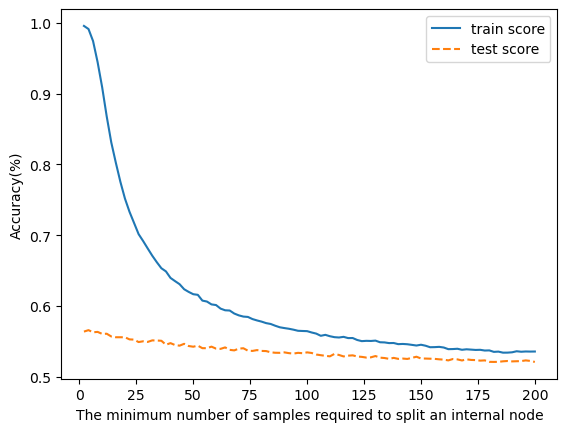

In [76]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit_parallel(algorithm, algorithm_name,
                 x_train, y_train, x_test, y_test,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [102]:
n_split = 7

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9517     0.5648
1                  4      0.8483     0.5634
2                  6      0.7435     0.5542
3                  8      0.6859     0.5500
4                 10      0.6507     0.5452
5                 12      0.6259     0.5443
6                 14      0.6080     0.5422
7                 16      0.5975     0.5402
8                 18      0.5883     0.5394
9                 20      0.5782     0.5335
10                22      0.5700     0.5316
11                24      0.5640     0.5326
12                26      0.5596     0.5314
13                28      0.5579     0.5293
14                30      0.5527     0.5265
15                32      0.5489     0.5258
16                34      0.5458     0.5248
17                36      0.5442     0.5236
18                38      0.5409     0.5216
19                40      0.5387     0.5208
20                42      0.5375     0.5177
21                44      0.5356

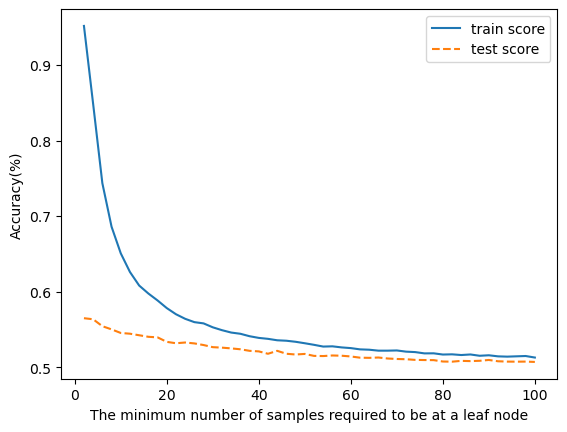

In [78]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf_parallel(algorithm, algorithm_name, 
               x_train, y_train, x_test, y_test, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [103]:
n_leaf = 4

최종 모델 저장 완료! 파일 경로: C:\Users\user\Desktop\machine\omr_rfc.pkl

Accuracy: 0.560
Precision (macro): 0.400
Recall (macro): 0.170
F1-score (macro): 0.185


<Figure size 1000x1000 with 0 Axes>

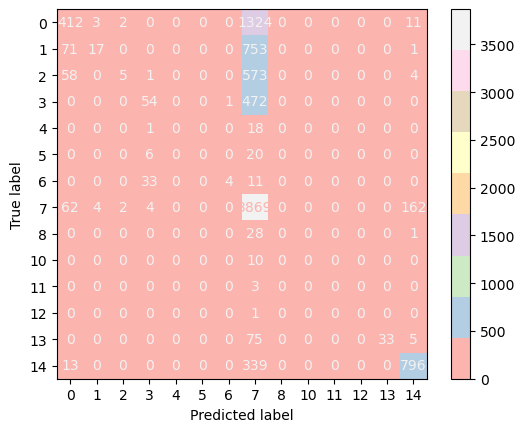

ROC AUC could not be calculated: Only one class present in y_true. ROC AUC score is not defined in that case.


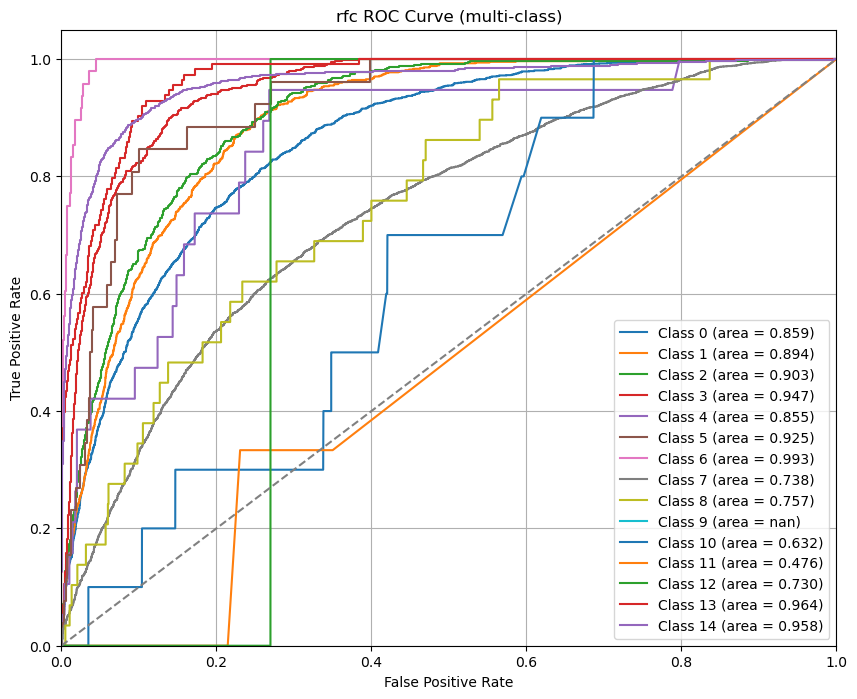

In [104]:
model_final(algorithm, algorithm_name,
            x_train, y_train, x_test, y_test,
            n_estimator, n_depth, n_split, n_leaf)

In [106]:
y_train.value_counts(normalize=True)

fixed_type_encoded
7     0.441066
0     0.184923
14    0.125920
1     0.091073
2     0.071683
3     0.059975
13    0.009626
6     0.007127
8     0.003147
5     0.002499
4     0.001527
12    0.000509
10    0.000463
9     0.000231
11    0.000231
Name: proportion, dtype: float64

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 파라미터 범위를 랜덤 탐색에 적합하게 설정
param_distributions = {
    'n_estimators': np.arange(1, 1001, 2),  # 1에서 1000까지 2단위로 랜덤 선택
    'max_depth': np.arange(1, 101, 2),        # 1에서 100까지 2단위로 랜덤 선택
    'min_samples_split': np.arange(1, 51, 2),   # 1에서 50까지 2단위로 랜덤 선택
    'min_samples_leaf': np.arange(1, 51, 1)     # 1에서 50까지 랜덤 선택
}

# 병렬 처리를 위해 n_jobs=-1 설정 (모든 코어 사용)
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1000), 
                                   param_distributions=param_distributions, 
                                   n_iter=50,  # 50번의 랜덤 조합을 탐색
                                   cv=5, scoring='accuracy', n_jobs=-1, random_state=1000)

# 모델 학습
random_search.fit(x_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 665, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 21}
